In [102]:
data_set = read.csv('survey lung cancer.csv')

In [148]:
library("psych")
library(repr)

In [129]:
data_set

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC.DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL.CONSUMING,COUGHING,SHORTNESS.OF.BREATH,SWALLOWING.DIFFICULTY,CHEST.PAIN,LUNG_CANCER
M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [137]:
data_set = subset(data_set, LUNG_CANCER=='YES')
summary(data_set)

 GENDER       AGE           SMOKING      YELLOW_FINGERS     ANXIETY     
 F:125   Min.   :38.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 M:145   1st Qu.:58.00   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
         Median :62.50   Median :2.000   Median :2.000   Median :2.000  
         Mean   :62.95   Mean   :1.574   Mean   :1.604   Mean   :1.526  
         3rd Qu.:69.00   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
         Max.   :81.00   Max.   :2.000   Max.   :2.000   Max.   :2.000  
 PEER_PRESSURE   CHRONIC.DISEASE    FATIGUE       ALLERGY         WHEEZING    
 Min.   :1.000   Min.   :1.000   Min.   :1.0   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.0   1st Qu.:1.000   1st Qu.:1.000  
 Median :2.000   Median :2.000   Median :2.0   Median :2.000   Median :2.000  
 Mean   :1.537   Mean   :1.526   Mean   :1.7   Mean   :1.619   Mean   :1.604  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.0   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :2.000 

**Średnia arytmetyczna**

In [167]:
tapply(data_set$AGE,data_set$GENDER,mean)

F        M 
62.78400 63.09655

In [139]:
mean(data_set$AGE)

[1] 62.95185

**Średnia harmoniczna**

In [140]:
tapply(data_set$AGE,data_set$GENDER,harmonic.mean)

F        M 
61.58303 62.17388

In [141]:
harmonic.mean(data_set$AGE)

[1] 61.89894

**Średnia geometryczna**

In [142]:
tapply(data_set$AGE,data_set$GENDER,geometric.mean)

F        M 
62.19205 62.64459

In [143]:
geometric.mean(data_set$AGE)

[1] 62.43468

**Średnia ucinana**

In [144]:
su <- function(X,k=50){
  P <- sort(X)
  return(1/(length(P)-2*k)*sum(P[(k+1):(length(P)-k)]))
}

In [145]:
tapply(data_set$AGE,data_set$GENDER,su)

F        M 
62.12000 62.82222

In [146]:
su(data_set$AGE)

[1] 62.88235

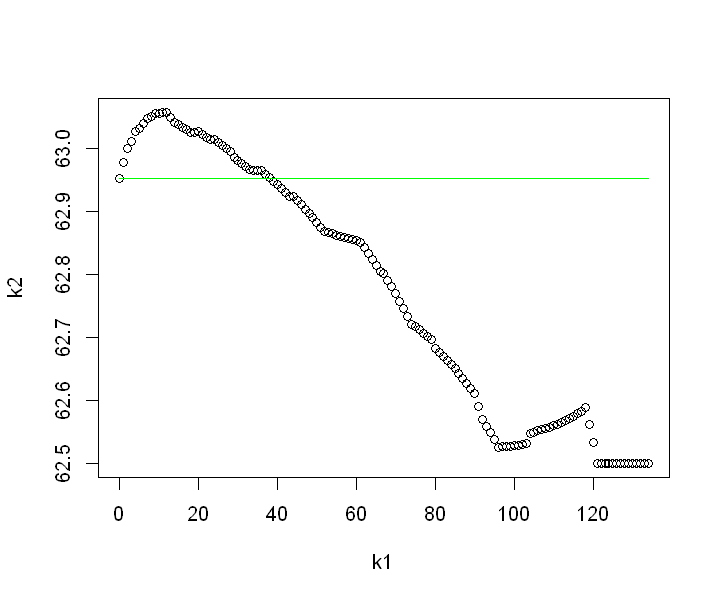

In [149]:
k1 <- seq(0,length(data_set$AGE)/2-1,1)
k2 <- numeric()
for(t in 1:length(k1)){
  k2[t] = su(data_set$AGE,k1[t])
}
options(repr.plot.width=6, repr.plot.height=5)
plot(k1,k2)
lines(k1,rep(mean(data_set$AGE),length(k1)), col='green')

**Średnia windsorowska**

In [158]:
sw <- function(X,k=50){
  P <- sort(X)
  return(1/length(P)*((k+1)*P[k+1]+sum(P[(k+2):(length(P)-k-1)])+(k+1)*P[length(P)-k]))
}

In [159]:
tapply(data_set$AGE,data_set$GENDER,sw)

F        M 
62.42400 62.94483

In [160]:
sw(data_set$AGE)

[1] 63.11111

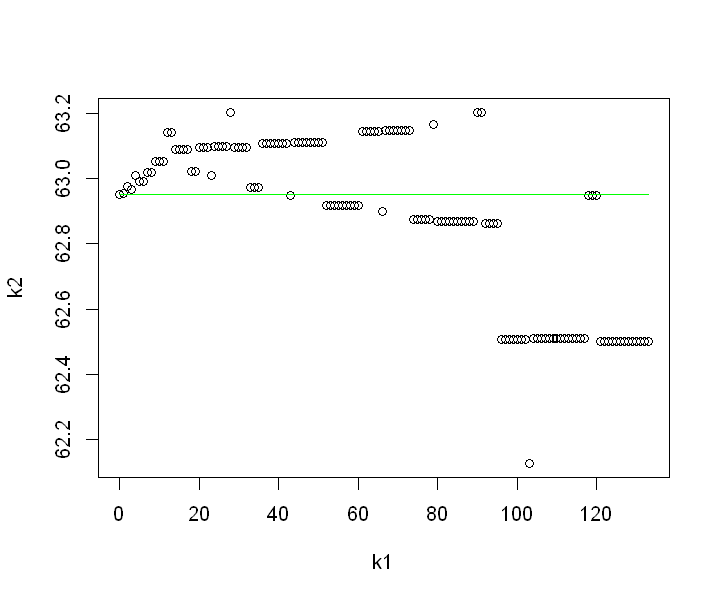

In [161]:
k1 <- seq(0,length(data_set$AGE)/2-2,1)
k2 <- numeric()
for(t in 1:length(k1)){
  k2[t] = sw(data_set$AGE,k1[t])
}
plot(k1,k2)
lines(k1,rep(mean(data_set$AGE),length(k1)), col='green')

**Mediana**

In [162]:
tapply(data_set$AGE,data_set$GENDER,median)

F  M 
62 63

In [163]:
median(data_set$AGE)

[1] 62.5

**Histogram**

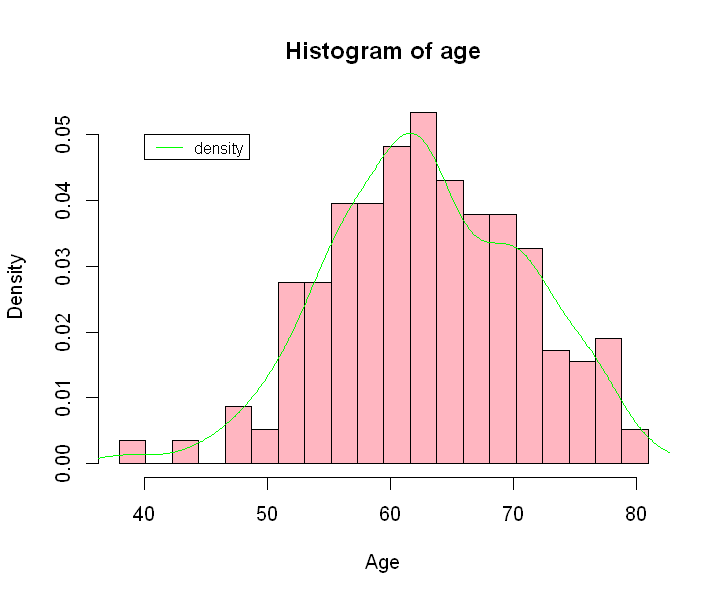

In [266]:
hist(data_set$AGE, breaks=seq(min(data_set$AGE),max(data_set$AGE),length.out=21), col='lightpink', freq=FALSE, xlab='Age', main='Histogram of age')
f <- density(data_set$AGE)
lines(f$x,f$y,col='green')
legend(40,0.05,legend='density', col='green',lty=1, cex=0.8)

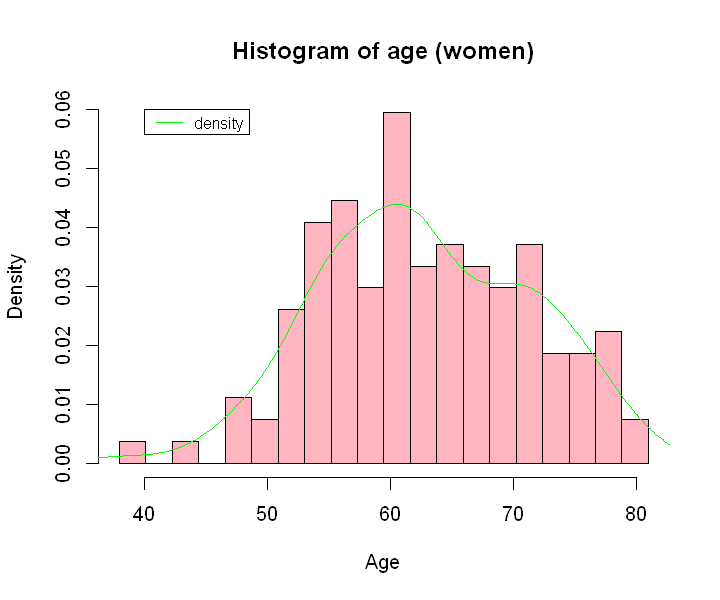

In [268]:
women = subset(data_set,GENDER=='F')
hist(women$AGE, breaks=seq(min(women$AGE),max(women$AGE),length.out=21), col='lightpink', freq=FALSE, xlab='Age', main='Histogram of age (women)')
f <- density(women$AGE)
lines(f$x,f$y,col='green')
legend(40,0.06,legend='density', col='green',lty=1, cex=0.8)

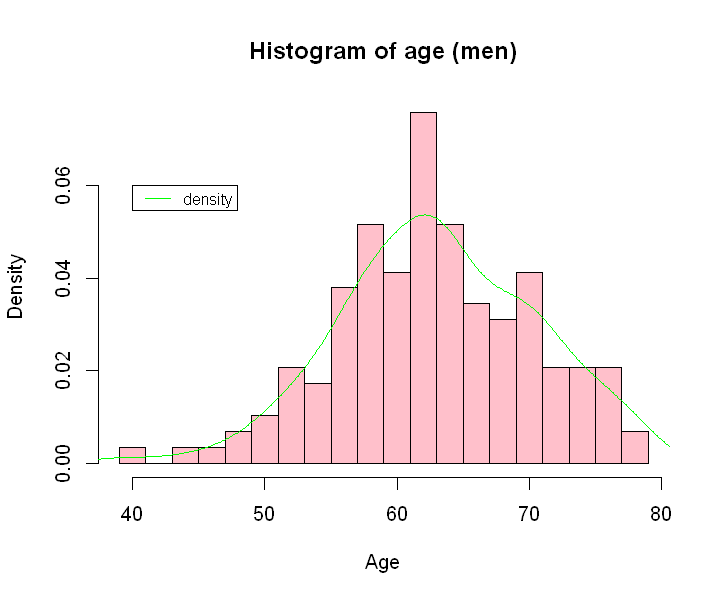

In [269]:
men = subset(data_set,GENDER=='M')
hist(men$AGE, breaks=seq(min(men$AGE),max(men$AGE),length.out=21), col='pink', freq=FALSE, xlab='Age', main='Histogram of age (men)')
f <- density(men$AGE)
lines(f$x,f$y,col='green')
legend(40,0.06,legend='density', col='green',lty=1, cex=0.8)

Boxplot

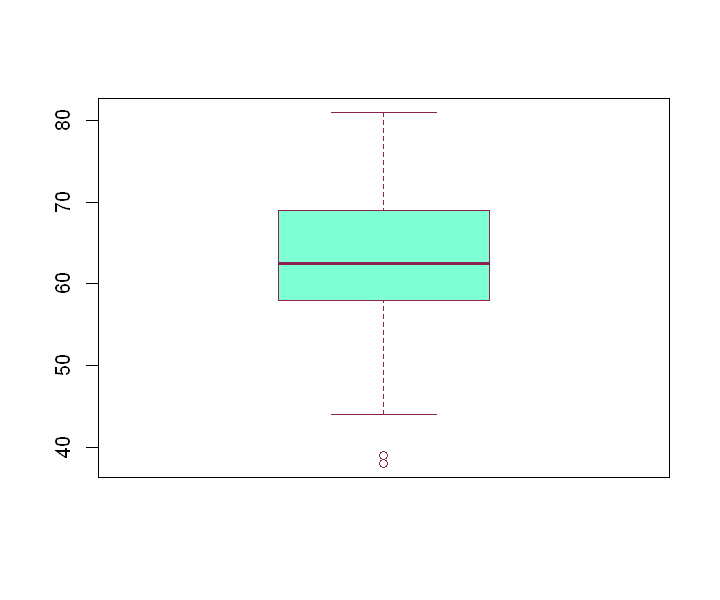

In [217]:
boxplot(data_set$AGE, col='aquamarine', border='violetred4')

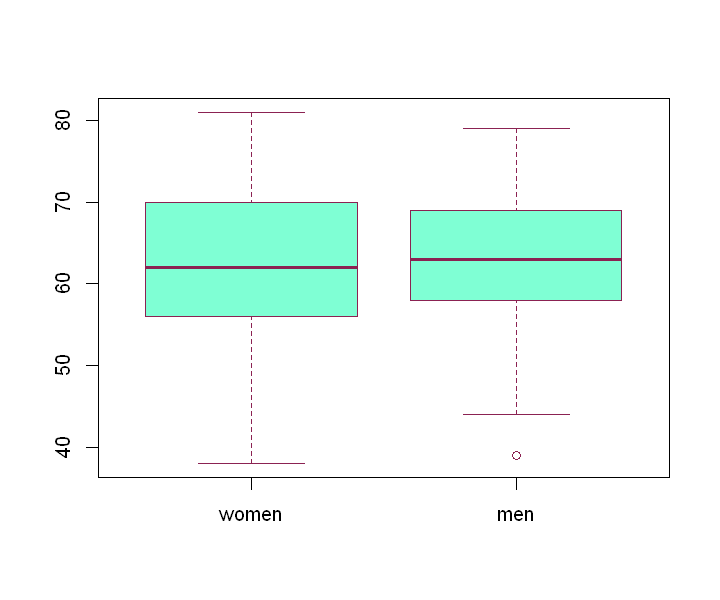

In [271]:
boxplot(women$AGE, men$AGE, col='aquamarine', border='violetred4', names=c('women','men'))
k = seq(0,5,0.1)
#lines(k,rep(mean(data_set$AGE),length(k)))

In [272]:
sm_women = subset(women,SMOKING>1)
non_sm_women = subset(women,SMOKING<2)
sm_men = subset(men,SMOKING>1)
non_sm_men = subset(men,SMOKING<2)

In [280]:
jpeg("rplot.jpg", width = 600, height = 800)
options(repr.plot.width=6, repr.plot.height=10)
boxplot(sm_women$AGE, sm_men$AGE, non_sm_women$AGE, non_sm_men$AGE, horizontal=TRUE, col='aquamarine', border='violetred4', names=c('smoking women','smoking men','not smoking women','not smoking men'))
dev.off()

png 
  2

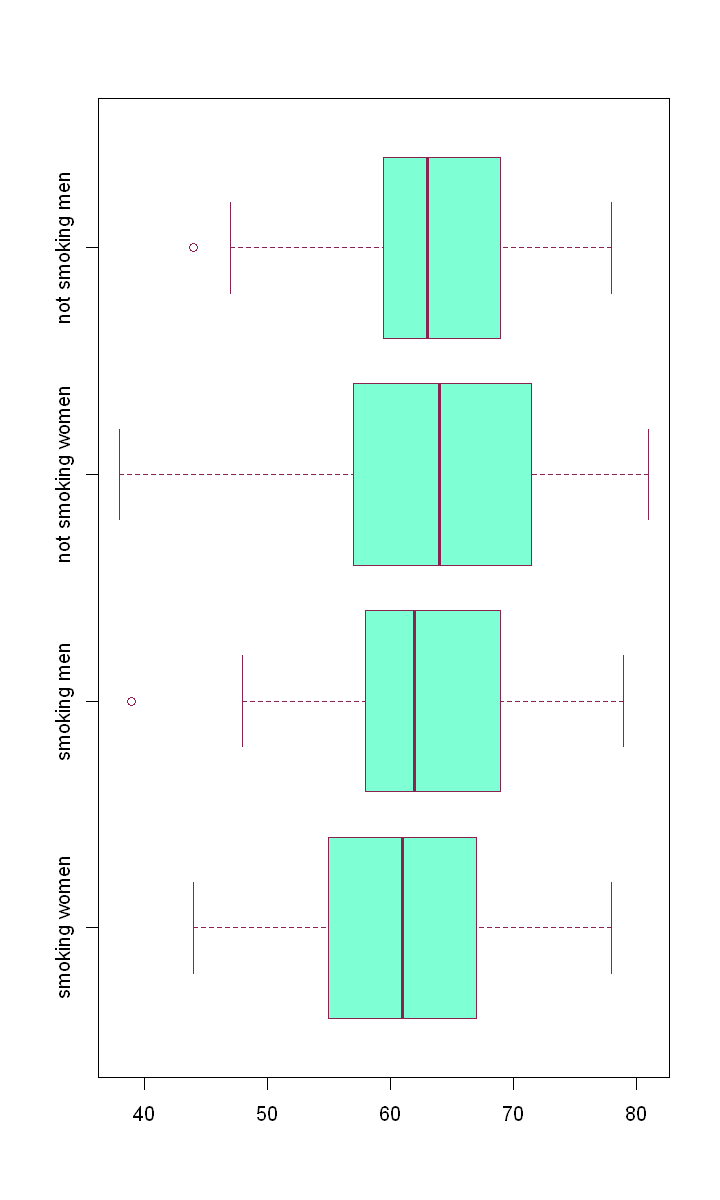

In [281]:
options(repr.plot.width=6, repr.plot.height=10)
boxplot(sm_women$AGE, sm_men$AGE, non_sm_women$AGE, non_sm_men$AGE, horizontal=TRUE, col='aquamarine', border='violetred4', names=c('smoking women','smoking men','not smoking women','not smoking men'))

Dystrybuanta empiryczna

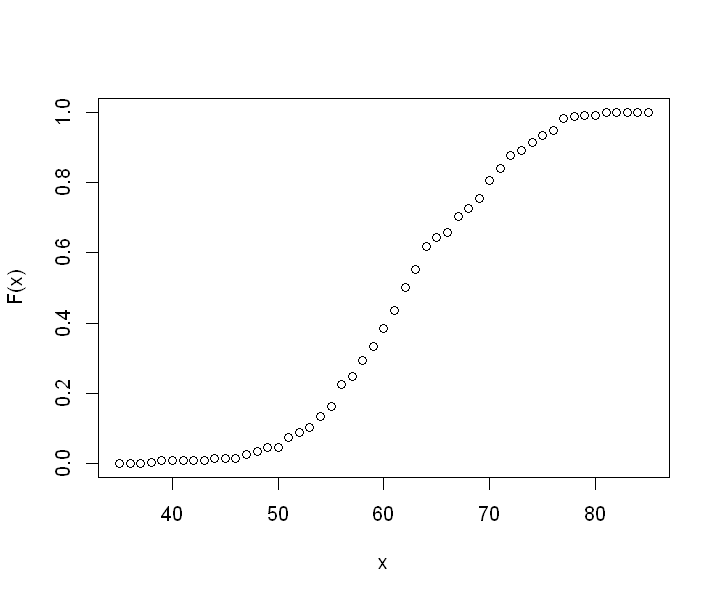

In [257]:
F <- ecdf(data_set$AGE)
x <- seq(35,85)
plot(x,F(x))

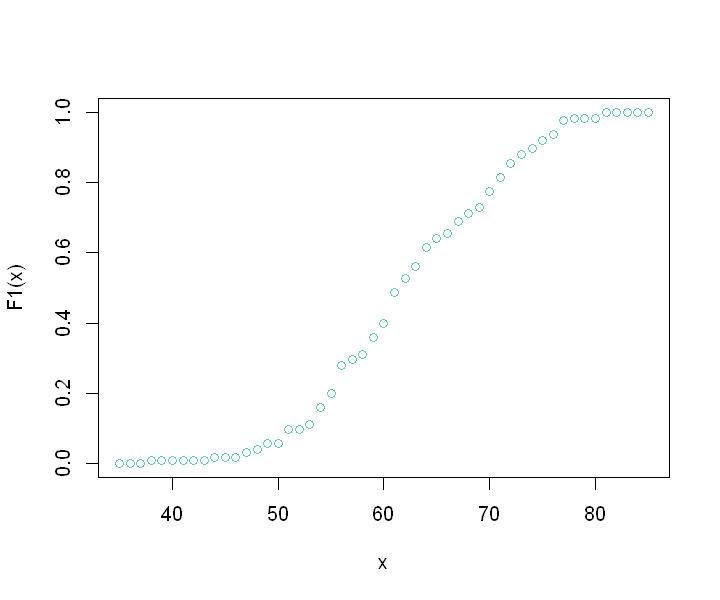

In [264]:
F1 <- ecdf(women$AGE)
plot(x,F1(x),col='aquamarine3')

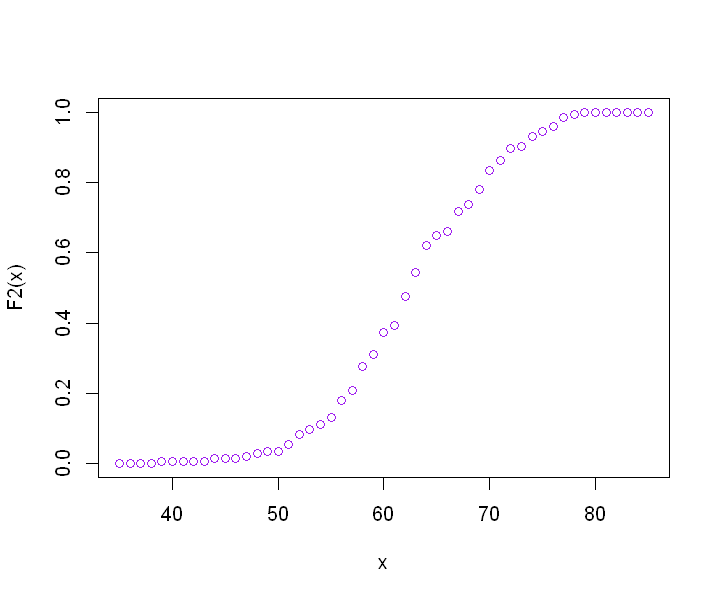

In [261]:
F2 <- ecdf(men$AGE)
plot(x,F2(x),col='purple')